Atividade Extensionista II - Análise de dados World Bank

In [ ]:
#Para gravar versões de outros pacotes
#!pip install -q -U watermark

In [1]:
#Numpy e pandas para manipulação de dados
import numpy as np
import pandas as pd
#Matplot e Seaborn para gráficos
import matplotlib.pyplot as plt
import seaborn as sb
#Sklearn para machine learning
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
%reload_ext watermark
%watermark -a "Gabrielle Regina dos Santos Rossi" --iversions

Author: Gabrielle Regina dos Santos Rossi

sklearn   : 0.24.1
matplotlib: 3.3.4
pandas    : 1.2.4
numpy     : 1.20.1
seaborn   : 0.11.1



In [3]:
dados_egov = pd.read_excel("C:/Users/Gabi/Downloads/API_BRA_DS2_pt_excel_v2_4327825.xlsx", sheet_name ="Data_Transposta")

In [4]:
#Verifica quantidade de linhas e colunas
dados_egov.shape

(62, 10)

In [5]:
#As primeiras 5 linhas do dataframe
dados_egov.head()

,ano_coleta,pop_cresc_anual%,despesas_educ_total,pib_cresc_anual%,pib_cor_us$,pib_deflator,pib_cresc_per_capita_%pib,receita_excl_doa_%pib,despesa_nac_bruta_%pib,ibrd_e_ida
0,1960,NaN,NaN,NaN,1.703047e+10,NaN,17.523227,NaN,NaN,NaN
1,1961,2.911114,NaN,8.6,1.727594e+10,34.617805,18.835467,NaN,NaN,NaN
2,1962,2.921449,NaN,6.6,1.923175e+10,50.249454,20.312674,NaN,NaN,NaN
3,1963,2.908779,NaN,0.6,2.328771e+10,78.417433,19.039697,NaN,NaN,NaN
4,1964,2.868020,NaN,3.4,2.096373e+10,89.533665,18.822604,NaN,NaN,NaN


In [5]:
#Verifica o tipo de dados
dados_egov.dtypes

ano_coleta                      int64
pop_cresc_anual%              float64
despesas_educ_total           float64
pib_cresc_anual%              float64
pib_cor_us$                   float64
pib_deflator                  float64
pib_cresc_per_capita_%pib     float64
receita_excl_doa_%pib         float64
despesa_nac_bruta_%pib        float64
ibrd_e_ida                    float64
dtype: object

In [6]:
#Resumo estatístico
dados_egov.describe()

,ano_coleta,pop_cresc_anual%,despesas_educ_total,pib_cresc_anual%,pib_cor_us$,pib_deflator,pib_cresc_per_capita_%pib,receita_excl_doa_%pib,despesa_nac_bruta_%pib,ibrd_e_ida
count,62.000000,61.000000,21.000000,61.000000,6.200000e+01,61.000000,62.000000,11.000000,11.000000,5.100000e+01
mean,1990.500000,1.781628,5.128236,3.878298,7.131600e+11,206.190977,19.848726,28.586782,62.547251,2.131404e+11
std,18.041619,0.708045,0.907255,4.151579,7.807170e+11,538.053972,2.699786,1.065324,4.629517,1.734120e+11
min,1960.000000,0.672384,3.750370,-4.350000,1.703047e+10,3.671385,14.625588,26.187643,57.228409,5.984162e+09
25%,1975.250000,1.090193,4.479080,1.140829,1.351949e+11,7.943127,17.777108,28.203808,59.595574,9.672546e+10
50%,1990.500000,1.759414,5.268840,3.961989,3.448187e+11,26.528942,19.595310,28.996437,61.318780,1.609642e+11
75%,2005.750000,2.369530,5.855100,6.600000,1.053628e+12,92.141945,21.820034,29.201654,63.880092,2.540361e+11
max,2021.000000,2.921449,6.320480,13.968722,2.616157e+12,2736.970678,26.902787,29.670105,73.418804,5.686459e+11


In [8]:
#Verificamos se há valores ausentes no dataframe
dados_egov.isnull().sum()

ano_coleta                     0
pop_cresc_anual%               1
despesas_educ_total           41
pib_cresc_anual%               1
pib_cor_us$                    0
pib_deflator                   1
pib_cresc_per_capita_%pib      0
receita_excl_doa_%pib         51
despesa_nac_bruta_%pib        51
ibrd_e_ida                    11
dtype: int64

Limpeza dos Dados

In [9]:
#Tratando valores ausentes através de backfilling
dados_egov['despesas_educ_total '].fillna(method = 'bfill', inplace = True)
dados_egov['receita_excl_doa_%pib '].fillna(method = 'bfill', inplace = True)
dados_egov['despesa_nac_bruta_%pib '].fillna(method = 'bfill', inplace = True)



In [10]:
#Tratamento valores ausentes através de interpolação

dados_egov = dados_egov.interpolate()

In [11]:
#Verificamos como o dataframe ficou após o tratamento
dados_egov.isnull().sum()

ano_coleta                     0
pop_cresc_anual%               1
despesas_educ_total            0
pib_cresc_anual%               1
pib_cor_us$                    0
pib_deflator                   1
pib_cresc_per_capita_%pib      0
receita_excl_doa_%pib          0
despesa_nac_bruta_%pib         0
ibrd_e_ida                    10
dtype: int64

In [12]:
#Não houve perda de dados após o tratamento dos campos nulos
dados_egov.shape

(62, 10)

In [13]:
#Para facilitar a manipulação, arredondamos os valores em 4 casas decimais
dados_egov = dados_egov.round(4)

In [14]:
dados_egov.head()

,ano_coleta,pop_cresc_anual%,despesas_educ_total,pib_cresc_anual%,pib_cor_us$,pib_deflator,pib_cresc_per_capita_%pib,receita_excl_doa_%pib,despesa_nac_bruta_%pib,ibrd_e_ida
0,1960,NaN,4.5682,NaN,1.703047e+10,NaN,17.5232,28.9964,63.9524,NaN
1,1961,2.9111,4.5682,8.6,1.727594e+10,34.6178,18.8355,28.9964,63.9524,NaN
2,1962,2.9214,4.5682,6.6,1.923175e+10,50.2495,20.3127,28.9964,63.9524,NaN
3,1963,2.9088,4.5682,0.6,2.328771e+10,78.4174,19.0397,28.9964,63.9524,NaN
4,1964,2.8680,4.5682,3.4,2.096373e+10,89.5337,18.8226,28.9964,63.9524,NaN


In [15]:
#Salvando o dataset já limpo em csv
dados_egov.to_csv('C:/Users/Gabi/Downloads/dataset_limpo', index = False)

In [7]:
#Carregando o dataset limpo
df = pd.read_csv('C:/Users/Gabi/Downloads/dataset_limpo')

In [8]:
df.head()

,ano_coleta,pop_cresc_anual%,despesas_educ_total,pib_cresc_anual%,pib_cor_us$,pib_deflator,pib_cresc_per_capita_%pib,receita_excl_doa_%pib,despesa_nac_bruta_%pib,ibrd_e_ida
0,1960,NaN,4.5682,NaN,1.703047e+10,NaN,17.5232,28.9964,63.9524,NaN
1,1961,2.9111,4.5682,8.6,1.727594e+10,34.6178,18.8355,28.9964,63.9524,NaN
2,1962,2.9214,4.5682,6.6,1.923175e+10,50.2495,20.3127,28.9964,63.9524,NaN
3,1963,2.9088,4.5682,0.6,2.328771e+10,78.4174,19.0397,28.9964,63.9524,NaN
4,1964,2.8680,4.5682,3.4,2.096373e+10,89.5337,18.8226,28.9964,63.9524,NaN


Text(0, 0.5, 'Crescimento per capita')

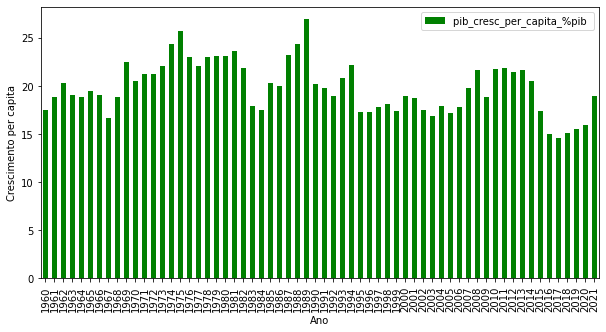

In [9]:
#Qual ano o país teve um alto crescimento do PIB Per Capita? 
#Gráfico

df.plot(x = 'ano_coleta ', y = ["pib_cresc_per_capita_%pib "], kind = "bar", figsize = (10,5), color = 'green')
plt.xlabel("Ano")
plt.ylabel("Crescimento per capita")

In [10]:
#Qual ano teve maior despesa com educação?
#Calculamos o gasto nacional bruto em relação ao PIB
df['gasto_nac_bruto'] = df['despesa_nac_bruta_%pib ']/100
df.head()

,ano_coleta,pop_cresc_anual%,despesas_educ_total,pib_cresc_anual%,pib_cor_us$,pib_deflator,pib_cresc_per_capita_%pib,receita_excl_doa_%pib,despesa_nac_bruta_%pib,ibrd_e_ida,gasto_nac_bruto
0,1960,NaN,4.5682,NaN,1.703047e+10,NaN,17.5232,28.9964,63.9524,NaN,0.639524
1,1961,2.9111,4.5682,8.6,1.727594e+10,34.6178,18.8355,28.9964,63.9524,NaN,0.639524
2,1962,2.9214,4.5682,6.6,1.923175e+10,50.2495,20.3127,28.9964,63.9524,NaN,0.639524
3,1963,2.9088,4.5682,0.6,2.328771e+10,78.4174,19.0397,28.9964,63.9524,NaN,0.639524
4,1964,2.8680,4.5682,3.4,2.096373e+10,89.5337,18.8226,28.9964,63.9524,NaN,0.639524


In [18]:
df['gasto_educacao'] = df['despesas_educ_total ']/100 *df['gasto_nac_bruto']
df.head()

,ano_coleta,pop_cresc_anual%,despesas_educ_total,pib_cresc_anual%,pib_cor_us$,pib_deflator,pib_cresc_per_capita_%pib,receita_excl_doa_%pib,despesa_nac_bruta_%pib,ibrd_e_ida,gasto_nac_bruto,gasto_educacao
0,1960,NaN,4.5682,NaN,1.703047e+10,NaN,17.5232,28.9964,63.9524,NaN,0.639524,0.029215
1,1961,2.9111,4.5682,8.6,1.727594e+10,34.6178,18.8355,28.9964,63.9524,NaN,0.639524,0.029215
2,1962,2.9214,4.5682,6.6,1.923175e+10,50.2495,20.3127,28.9964,63.9524,NaN,0.639524,0.029215
3,1963,2.9088,4.5682,0.6,2.328771e+10,78.4174,19.0397,28.9964,63.9524,NaN,0.639524,0.029215
4,1964,2.8680,4.5682,3.4,2.096373e+10,89.5337,18.8226,28.9964,63.9524,NaN,0.639524,0.029215


<AxesSubplot:xlabel='ano_coleta\xa0'>

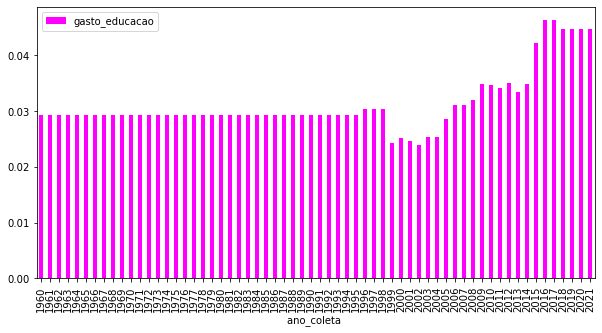

In [19]:
#Em gráfico
df.plot(x = 'ano_coleta ', y=['gasto_educacao'], kind = 'bar', figsize = (10,5), color='magenta')

<AxesSubplot:>

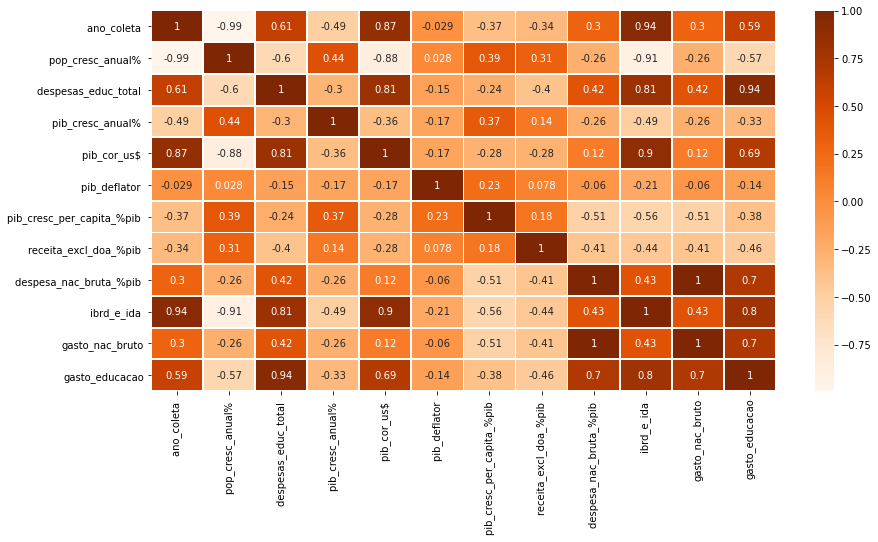

In [20]:
#Como a receita do governo se relaciona com as despesas do governo? 
# Calcula a correlação entre as variáveis no conjunto de dados usando o método de Pearson
df2 = df.corr(method = 'pearson')

# Definindo o tamanho do gráfico
plt.figure(figsize = (14,7)) 

# Visualiza a correlação em um mapa de calor (heatmap)
# Para escolha da cor, acessamos o link https://matplotlib.org/3.3.0/tutorials/colors/colormaps.html
sb.heatmap(df2, 
           xticklabels = df2.columns,
           yticklabels = df2.columns,
           cmap = 'Oranges',
           annot = True,
           linewidth = 0.8)

<function matplotlib.pyplot.show(close=None, block=None)>

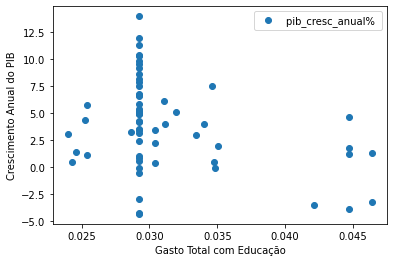

In [22]:
# Como os gastos com a educação afetam o crescimento do PIB
df.plot(x = 'gasto_educacao', y = 'pib_cresc_anual% ', style = 'o')
plt.xlabel('Gasto Total com Educação')
plt.ylabel('Crescimento Anual do PIB')
plt.show